In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [3]:
parent_dir = os.getcwd()
scalar_dir = parent_dir + "/logs_singlenet/gradient_tape"
train_logs = []
val_logs = []
for tv_log in os.listdir(scalar_dir):
    print(f"  |- {tv_log}")
    tv_log_dir = os.path.join(scalar_dir,tv_log)
    for g_log in os.listdir(tv_log_dir):
        print(f"    |- {g_log}")
        if g_log == 'train':
            g_log_dir = os.path.join(tv_log_dir,g_log)
            for s_log in os.listdir(g_log_dir):
                train_logs.append(os.path.join(g_log_dir,s_log))
        elif g_log == 'val':
            g_log_dir = os.path.join(tv_log_dir,g_log)
            for s_log in os.listdir(g_log_dir):
                val_logs.append(os.path.join(g_log_dir,s_log))

  |- train
    |- paf0
    |- paf1
    |- paf2
    |- train
    |- val
  |- val
    |- paf0
    |- paf1
    |- paf2


start to process : d:\GithubCode\raspberry-project\model-test\singlenet-function/logs_singlenet/gradient_tape\train\train\events.out.tfevents.1621795473.ubuntu18.638.105.v2
start to process : d:\GithubCode\raspberry-project\model-test\singlenet-function/logs_singlenet/gradient_tape\train\train\events.out.tfevents.1621796596.ubuntu18.8852.105.v2
start to process : d:\GithubCode\raspberry-project\model-test\singlenet-function/logs_singlenet/gradient_tape\train\train\events.out.tfevents.1621820672.ubuntu18.19847.105.v2
start to process : d:\GithubCode\raspberry-project\model-test\singlenet-function/logs_singlenet/gradient_tape\train\train\events.out.tfevents.1621826340.ubuntu18.28084.105.v2
start to process : d:\GithubCode\raspberry-project\model-test\singlenet-function/logs_singlenet/gradient_tape\train\train\events.out.tfevents.1621826501.ubuntu18.29286.105.v2
start to process : d:\GithubCode\raspberry-project\model-test\singlenet-function/logs_singlenet/gradient_tape\train\train\events

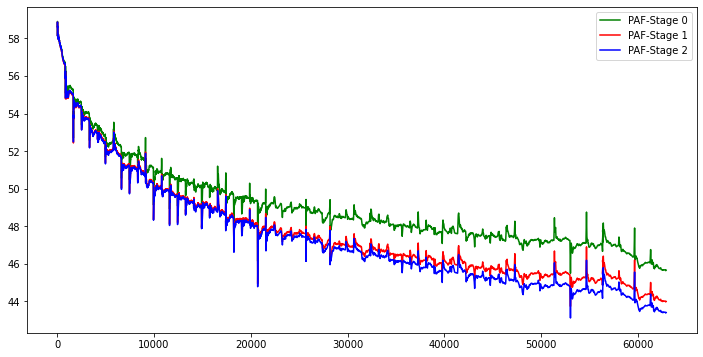

In [24]:
not_out_tag=['Test prediction','Val prediction']
paf_tag = {'tloss_paf/tloss_paf_stage_0':0,'tloss_paf/tloss_paf_stage_1':1,'tloss_paf/tloss_paf_stage_2':2}
paf_x=[[],[],[]]
paf_y=[[],[],[]]
fig_paf = plt.figure(figsize=(12,6))
# paf_ax=fig_paf.add_subplot(111)

rng = np.random.RandomState(0)


for event_log in train_logs:
    print(f"start to process : {event_log}")
    ea = EventAccumulator(event_log,size_guidance={'tensors': 0})
    ea.Reload()
    tags = ea.Tags()['tensors']
    color=rng.rand(3)
    for tag in tags:
        # if tag not in not_out_tag:
        if tag in paf_tag.keys():
            # print(f"[DEBUG] start to process {tag},id:{paf_tag[tag]}")
            for w,s,t in ea.Tensors(tag):
                # if tag == 'tloss_paf/tloss_paf_stage_0':
                    # print(f"step:{s}")
                if s > 47167:
                    s -= 46424
                paf_x[paf_tag[tag]].append(s)
                paf_y[paf_tag[tag]].append(tf.make_ndarray(t))


print("start to plt train paf")
plt.plot(paf_x[0],paf_y[0],c='g')
plt.plot(paf_x[1],paf_y[1],c='r')
plt.plot(paf_x[2],paf_y[2],c='b')
plt.legend(["PAF-Stage 0","PAF-Stage 1","PAF-Stage 2"])
plt.savefig("./pic/paf-all.png")


In [ ]:
for event_log in val_logs:
    ea = EventAccumulator(event_log)
    ea.Reload()
    tags = ea.Tags()['tensors']
    for tag in tags:
        # os.makedirs(os.path.join("./csv",tag))
        pf = pd.DataFrame([(w, s, tf.make_ndarray(t)) for w, s, t in ea.Tensors(tag)],
             columns=['wall_time', 'step', 'tensor'])
        pf.to_csv(f"./csv/{tag}.csv")    

In [ ]:
event_acc = EventAccumulator(r"D:\GithubCode\raspberry-project\model-test\singlenet-function/logs_singlenet/gradient_tape\train\train\events.out.tfevents.1621795473.ubuntu18.638.105.v2")
event_acc.Reload()
event_acc.Tags()

In [ ]:
pd.DataFrame(event_acc.Tensors('tloss_a/tloss_a'))

In [ ]:
pd.DataFrame([(w, s, tf.make_ndarray(t)) for w, s, t in event_acc.Tensors('tloss_a/tloss_a')],
             columns=['wall_time', 'step', 'tensor'])